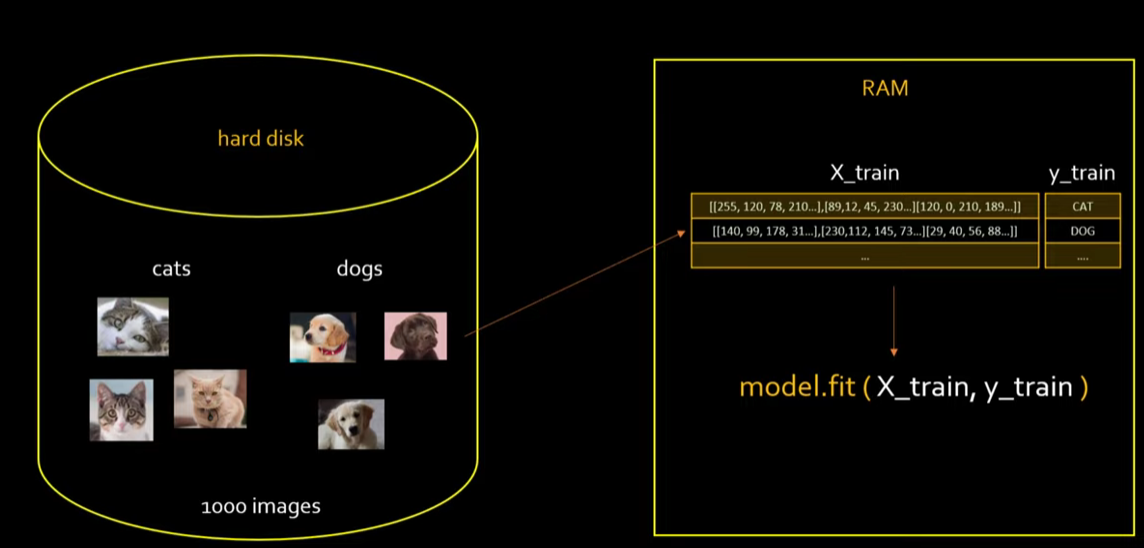

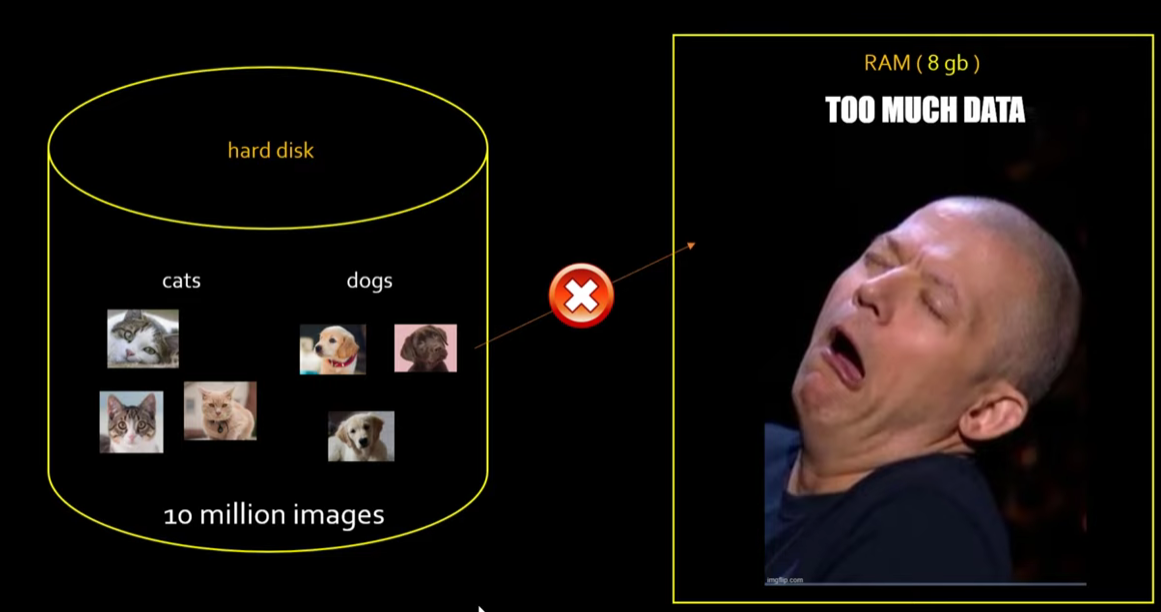

# 1 Streaming Approch

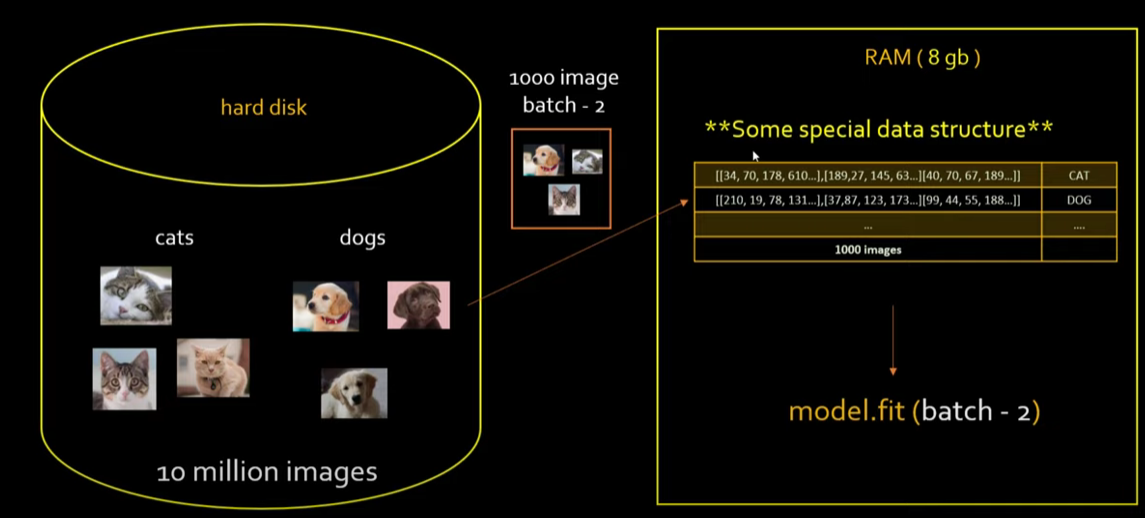

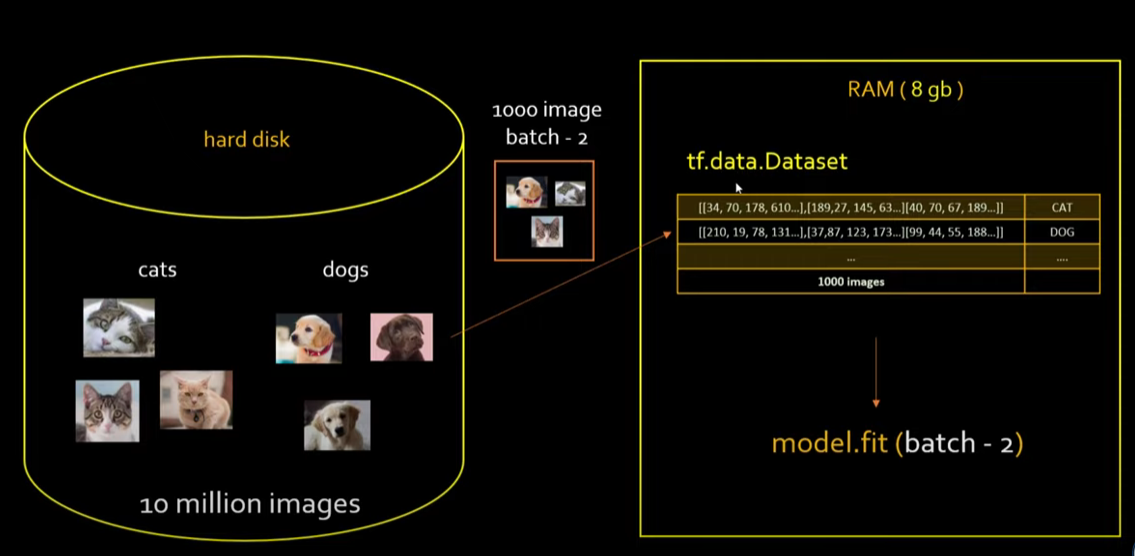

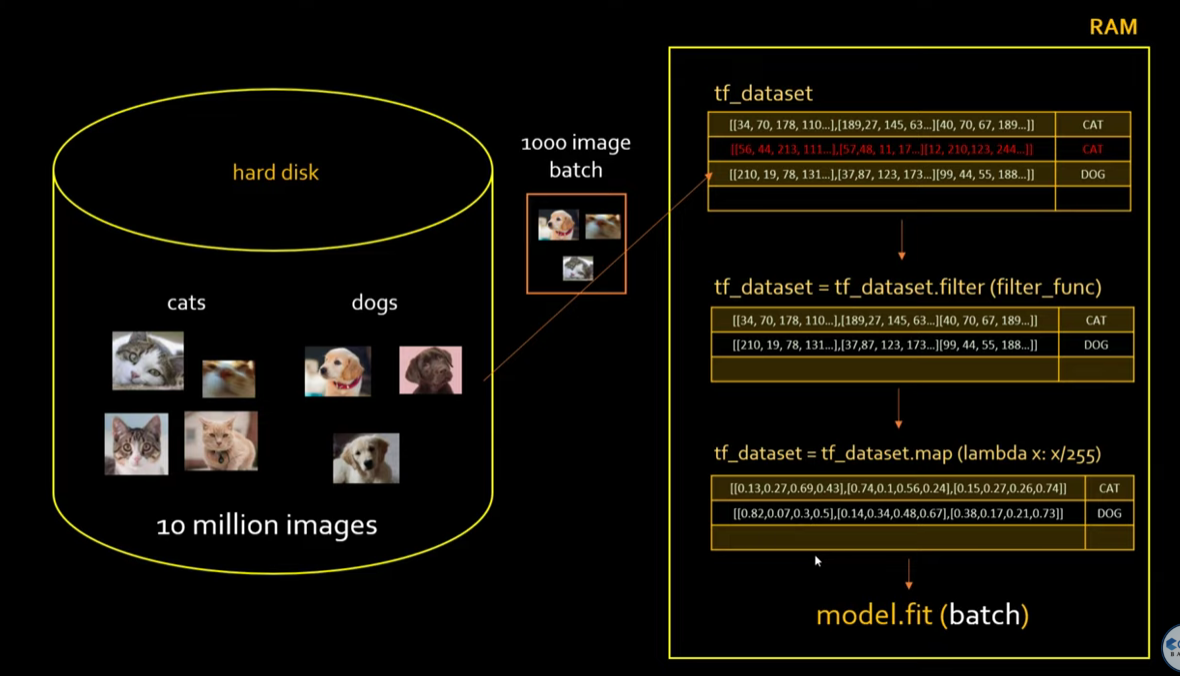

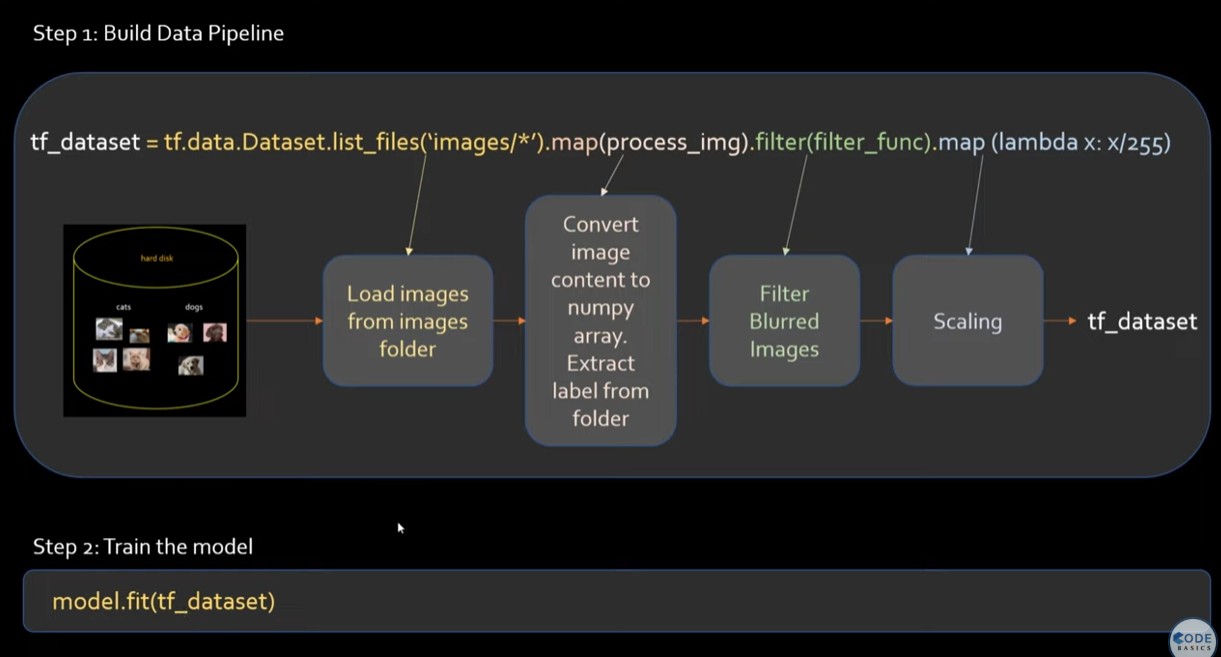

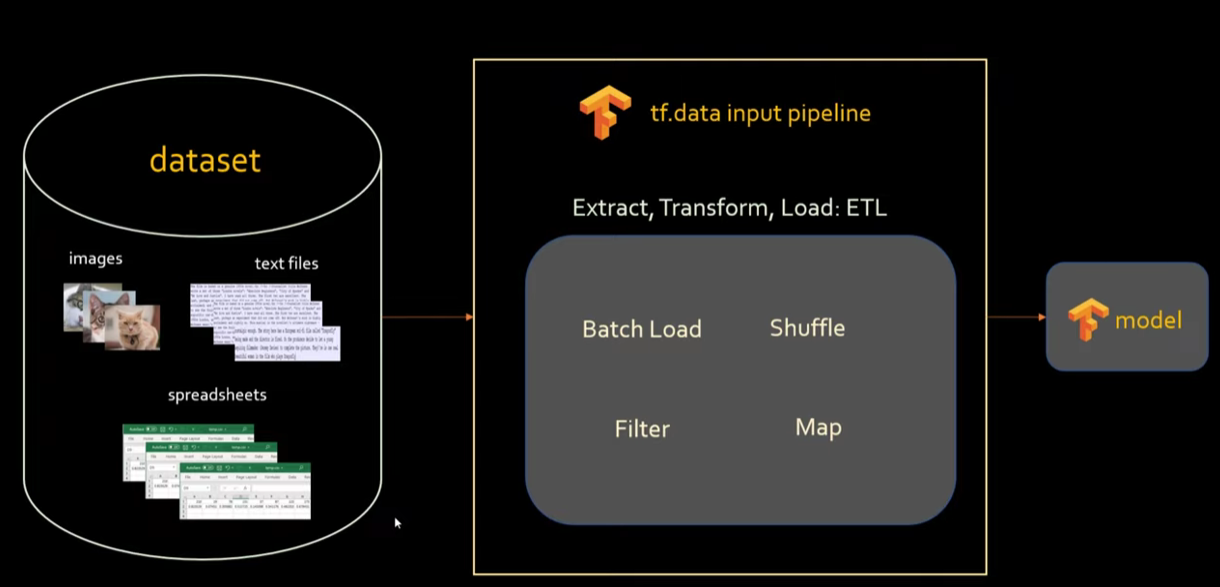

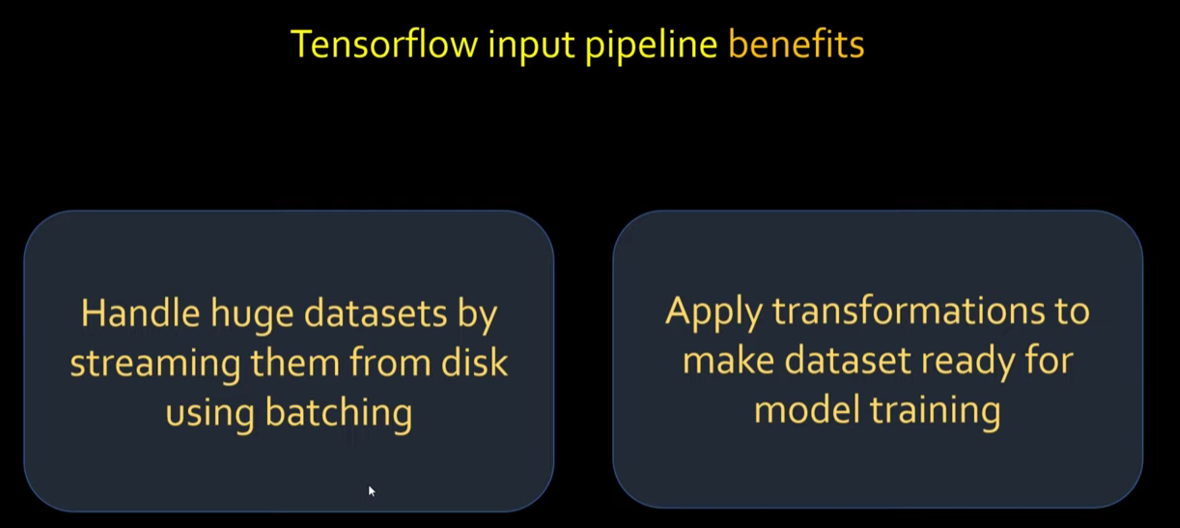

In [34]:
import tensorflow as tf

## Create tf dataset from a list

In [35]:
daily_sales_numbers = [21, 22, -108, 31, -1, 32, 34,31]

tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

## Iterate through tf dataset

In [36]:
for sales in tf_dataset:
    print(sales.numpy())

21
22
-108
31
-1
32
34
31


## Iterate through elements as numpy elements

In [37]:
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
-108
31
-1
32
34
31


## Iterate through first n elements in tf dataset

In [38]:
for sales in tf_dataset.take(3):
    print(sales.numpy())

21
22
-108


## Filter sales numbers that are < 0

In [39]:
tf_dataset = tf_dataset.filter(lambda x: x>0)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
31
32
34
31


## Convert sales numbers from USA dollars ($) to Indian Rupees (INR) Assuming 1->72 conversation rate

In [40]:
tf_dataset = tf_dataset.map(lambda x: x*72)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)


1512
1584
2232
2304
2448
2232


## Shuffe

https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

In [41]:
tf_dataset = tf_dataset.shuffle(2)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

1584
2232
1512
2448
2232
2304


## Batching

In [42]:
for sales_batch in tf_dataset.batch(2):
    print(sales_batch.numpy())

[1512 1584]
[2232 2304]
[2448 2232]


## Perform all of the above operations in one shot

In [43]:
tf_dataset= tf.data.Dataset.from_tensor_slices(daily_sales_numbers)

tf_dataset = tf_dataset.filter(lambda x:x>0).map(lambda y:y*72).shuffle(2).batch(2)

for sales in tf_dataset.as_numpy_iterator():
    print(sales)

[1512 1584]
[2232 2304]
[2448 2232]


## Images

In [44]:
images_ds = tf.data.Dataset.list_files('images/*/*', shuffle=False)

In [45]:
image_count = len(images_ds)
image_count

20

In [46]:
type(images_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [47]:
for file in images_ds.take(3):
    print(file.numpy())

b'images\\cat\\OIP (1).jpg'
b'images\\cat\\OIP (2).jpg'
b'images\\cat\\OIP (3).jpg'


In [48]:
images_ds = images_ds.shuffle(15)
for file in images_ds.take(3):
    print(file.numpy())

b'images\\dog\\OIP (1).jpg'
b'images\\cat\\OIP (1).jpg'
b'images\\cat\\OIP (6).jpg'


In [49]:
class_names = ["cat","dog"]

In [50]:
train_size = int(image_count*0.8)
train_ds = images_ds.take(train_size)
test_ds = images_ds.skip(train_size)

In [51]:
len(train_ds)

16

In [52]:
len(test_ds)

4

In [53]:
def get_label(file_path):
    import os
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]
# this function will return dog or cat

In [54]:
for t in train_ds.map(get_label).take(5):
    # print(t)
    print(t.numpy())

b'cat'
b'cat'
b'dog'
b'dog'
b'cat'


In [55]:
get_label("images\\dog\\download.jpg")

s = "images\\dog\\download.jpg"
s.split("\\")

['images', 'dog', 'download.jpg']

In [56]:
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path) # load the raw data from the file as a string
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    return img, label

In [57]:
img, label = process_image("images\\dog\\download.jpg")
img.numpy()[:2]

array([[[ 53.90625  ,  93.90625  ,  22.602173 ],
        [ 58.0625   ,  98.10455  ,  24.978394 ],
        [ 61.93988  , 102.84375  ,  27.132141 ],
        [ 63.171875 , 104.171875 ,  26.675415 ],
        [ 63.338257 , 104.46442  ,  25.085938 ],
        [ 66.58594  , 108.58594  ,  26.507812 ],
        [ 66.58594  , 108.58594  ,  23.679565 ],
        [ 66.09375  , 108.60156  ,  21.078125 ],
        [ 69.3125   , 112.3125   ,  23.170593 ],
        [ 68.4884   , 108.558716 ,  19.544983 ],
        [ 70.125    , 111.125    ,  17.703125 ],
        [ 71.41406  , 112.41406  ,  17.523438 ],
        [ 70.234375 , 111.33966  ,  15.129089 ],
        [ 68.5      , 110.46442  ,  12.5355835],
        [ 72.64844  , 114.64844  ,  14.939575 ],
        [ 74.765625 , 116.765625 ,  15.276733 ],
        [ 77.234375 , 119.234375 ,  17.234375 ],
        [ 79.85156  , 122.703125 ,  18.148438 ],
        [ 83.34375  , 126.34375  ,  21.34375  ],
        [ 85.734375 , 128.73438  ,  23.734375 ],
        [ 87.50079  

In [58]:
train_ds = train_ds.map(process_image)
test_ds = test_ds.map(process_image)

In [59]:
for image, label in train_ds.take(1):
    print("****",image)
    print("****",label)

**** tf.Tensor(
[[[237.10883   207.2807    126.86496  ]
  [237.11554   210.23438   110.74774  ]
  [200.49377   175.5502     55.08304  ]
  ...
  [ 99.43359    64.43359     6.4335938]
  [ 91.         58.          4.       ]
  [ 89.90457    56.90457     2.9045715]]

 [[217.68307   185.95651    93.11893  ]
  [206.07578   176.58307    69.670044 ]
  [182.26996   153.90103    31.499115 ]
  ...
  [ 98.60547    63.81076     5.1948853]
  [ 91.07474    58.149475    3.9252625]
  [ 89.82535    56.825348    2.825348 ]]

 [[215.36328   178.15234    70.94473  ]
  [200.8815    165.67188    52.313354 ]
  [191.79297   159.58203    37.500122 ]
  ...
  [ 97.91797    63.91797     1.2012329]
  [ 93.140625   61.140625    4.097229 ]
  [ 91.91016    59.910156    2.9101562]]

 ...

 [[127.659      98.659      42.55078  ]
  [126.00696    97.38977    34.55774  ]
  [125.80493    95.01688    37.05493  ]
  ...
  [153.17477   125.305695   25.626007 ]
  [153.56683   124.140625   13.044708 ]
  [152.91016   122.91016    

In [60]:
def scale(image, label):
    return image/255,label

In [61]:
train_ds = train_ds.map(scale)

In [62]:
for image, label in train_ds.take(5):
    print("****Image: ",image.numpy()[0][0])
    print("****Label: ",label.numpy())

****Image:  [0.73138785 0.7039369  0.6294271 ]
****Label:  b'dog'
****Image:  [0.5138607  0.08855698 0.01585215]
****Label:  b'cat'
****Image:  [0.25957748 0.21644025 0.145852  ]
****Label:  b'cat'
****Image:  [0.4787071  0.36106005 0.32184437]
****Label:  b'dog'
****Image:  [0.86052364 0.8526805  0.69973934]
****Label:  b'cat'
